In [459]:
import pandas as pd
import numpy as np

In [460]:
df = pd.read_csv('cust_data.csv')
df = df.sample(frac=1, ignore_index=True)
feat_mat = df.copy()
feat_mat

,CustomerID,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Contract Period
0,0815-MFZGM,Morgan Hill,95037,37.161544,-121.649371,Female,No,Yes,No,42,...,Yes,Credit card (automatic),99.00,4135.00,No,0,76,4545,NaN,24
1,7609-NRNCA,Mountain Ranch,95246,38.264262,-120.515133,Female,No,No,No,17,...,No,Mailed check,19.55,280.85,No,0,42,4947,NaN,12
2,7182-OVLBJ,Kenwood,95452,38.419525,-122.521585,Female,No,Yes,Yes,62,...,Yes,Bank transfer (automatic),101.15,6638.35,No,0,36,5735,NaN,24
3,5666-MBJPT,Bakersfield,93304,35.339796,-119.023552,Male,No,No,No,65,...,Yes,Bank transfer (automatic),25.10,1725.00,No,0,46,5449,NaN,24
4,6838-YAUVY,Petaluma,94952,38.237018,-122.778720,Female,No,No,No,54,...,Yes,Bank transfer (automatic),95.10,5064.85,No,0,67,4825,NaN,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1897-OKVMW,Lathrop,95330,37.808210,-121.308401,Female,No,Yes,Yes,64,...,Yes,Mailed check,90.60,5817.45,No,0,43,5240,NaN,24
7039,1157-BQCUW,Fall River Mills,96028,41.017282,-121.468945,Male,No,No,No,1,...,Yes,Electronic check,74.95,74.95,Yes,1,82,2591,Attitude of service provider,1
7040,3569-EDBPQ,Pine Grove,95665,38.400264,-120.641274,Female,No,No,No,24,...,Yes,Electronic check,84.35,1938.05,No,0,31,2198,NaN,1
7041,8722-NGNBH,Walnut,91789,34.018354,-117.854920,Male,No,No,No,5,...,No,Mailed check,40.00,223.45,Yes,1,80,3125,Competitor had better devices,1


In [461]:
feat_mat['Total Charges'].duplicated().sum()

502

In [462]:
feat_mat.isnull().sum()
feat_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   City               7043 non-null   object 
 2   Zip Code           7043 non-null   int64  
 3   Latitude           7043 non-null   float64
 4   Longitude          7043 non-null   float64
 5   Gender             7043 non-null   object 
 6   Senior Citizen     7043 non-null   object 
 7   Partner            7043 non-null   object 
 8   Dependents         7043 non-null   object 
 9   Tenure Months      7043 non-null   int64  
 10  Phone Service      7043 non-null   object 
 11  Multiple Lines     7043 non-null   object 
 12  Internet Service   7043 non-null   object 
 13  Online Security    7043 non-null   object 
 14  Online Backup      7043 non-null   object 
 15  Device Protection  7043 non-null   object 
 16  Tech Support       7043 

In [463]:
Label_Churn = df['Churn Value'].copy()
feat_mat = feat_mat.drop(['Churn Reason', 'Churn Score', 'CustomerID', 'Contract Period', 'Churn Label', 'Churn Value'], axis=1)
feat_mat['Churn Value'] = Label_Churn
feat_mat.isnull().sum()

City                 0
Zip Code             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
CLTV                 0
Churn Value          0
dtype: int64

In [464]:
feat_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   object 
 10  Multiple Lines     7043 non-null   object 
 11  Internet Service   7043 non-null   object 
 12  Online Security    7043 non-null   object 
 13  Online Backup      7043 non-null   object 
 14  Device Protection  7043 non-null   object 
 15  Tech Support       7043 non-null   object 
 16  Streaming TV       7043 

In [465]:
feat_mat['Payment Method'][515]

'Bank transfer (automatic)'

In [466]:
feat_mat.shape

(7043, 25)

In [467]:
feat_mat['Churn Value']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    1
7040    0
7041    1
7042    0
Name: Churn Value, Length: 7043, dtype: int64

In [468]:
feat_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   object 
 10  Multiple Lines     7043 non-null   object 
 11  Internet Service   7043 non-null   object 
 12  Online Security    7043 non-null   object 
 13  Online Backup      7043 non-null   object 
 14  Device Protection  7043 non-null   object 
 15  Tech Support       7043 non-null   object 
 16  Streaming TV       7043 

In [469]:
from sklearn.preprocessing import LabelEncoder
import pickle

label_cat = ['City', 'Gender', 'Zip Code', 'Senior Citizen', 'Contract', 'Partner', 'Phone Service', 'Dependents', 'Multiple Lines', 'Internet Service', 'Online Security', 
             'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 
             'Streaming Movies', 'Paperless Billing', 'Payment Method']

encoders = {}

for cat in label_cat:
    encoder = LabelEncoder()
    feat_mat[cat] = encoder.fit_transform(feat_mat[f'{cat}'])
    encoders[cat] = encoder

with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

print(feat_mat['Zip Code'].nunique())

1652


In [470]:
feat_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   int32  
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   int32  
 5   Senior Citizen     7043 non-null   int32  
 6   Partner            7043 non-null   int32  
 7   Dependents         7043 non-null   int32  
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   int32  
 10  Multiple Lines     7043 non-null   int32  
 11  Internet Service   7043 non-null   int32  
 12  Online Security    7043 non-null   int32  
 13  Online Backup      7043 non-null   int32  
 14  Device Protection  7043 non-null   int32  
 15  Tech Support       7043 non-null   int32  
 16  Streaming TV       7043 

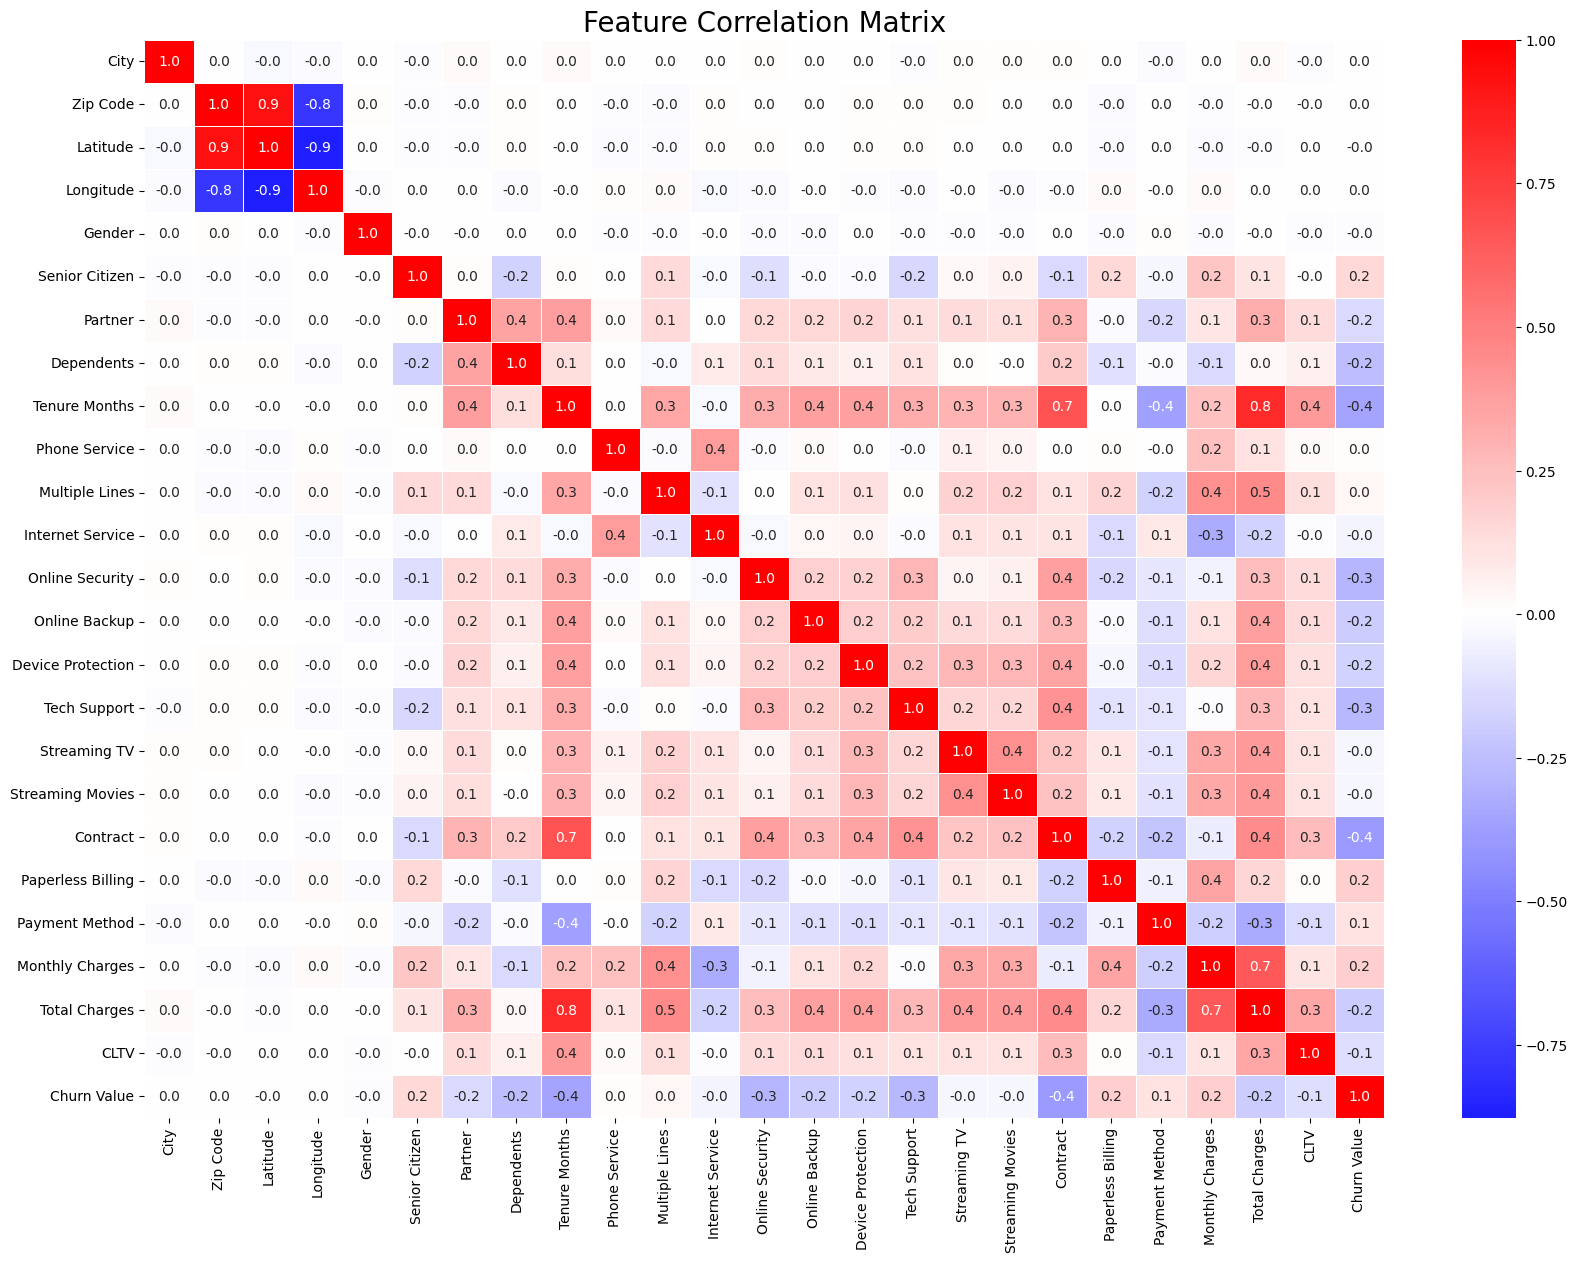

In [471]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = feat_mat.corr()
plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, cmap="bwr", center=0, annot=True, fmt=".1f", linewidths=.5)
plt.title('Feature Correlation Matrix', size=20)
plt.show()

In [472]:
feat_mat = feat_mat.drop(['City', 'Zip Code', 'Gender', 'Longitude', 'Latitude', 'Phone Service'], axis=1)

In [473]:
feat_mat

,Senior Citizen,Partner,Dependents,Tenure Months,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Value
0,0,1,0,42,0,1,0,0,2,2,2,2,2,1,1,99.00,4135.00,4545,0
1,0,0,0,17,0,2,1,1,1,1,1,1,1,0,3,19.55,280.85,4947,0
2,0,1,1,62,2,1,2,0,0,0,2,2,2,1,0,101.15,6638.35,5735,0
3,0,0,0,65,2,2,1,1,1,1,1,1,2,1,0,25.10,1725.00,5449,0
4,0,0,0,54,2,1,0,0,2,2,0,2,2,1,0,95.10,5064.85,4825,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,64,2,0,2,2,2,2,2,2,2,1,3,90.60,5817.45,5240,0
7039,0,0,0,1,2,1,0,0,0,0,0,0,0,1,2,74.95,74.95,2591,1
7040,0,0,0,24,2,1,2,0,0,2,0,0,0,1,2,84.35,1938.05,2198,0
7041,0,0,0,5,1,0,2,0,2,2,0,0,0,0,3,40.00,223.45,3125,1


In [474]:
from sklearn.feature_selection import mutual_info_classif

a = feat_mat.iloc[:, :-1]
b = feat_mat['Churn Value'] 

mi = mutual_info_classif(a, b)

mi_scores = pd.Series(mi, index=a.columns).sort_values(ascending=False)
print(mi_scores)

Contract             0.098844
Tenure Months        0.082607
Online Security      0.079033
Tech Support         0.066477
Internet Service     0.055858
Monthly Charges      0.048638
Payment Method       0.044539
Total Charges        0.042988
Dependents           0.041180
Device Protection    0.040093
Online Backup        0.036622
Streaming TV         0.030297
Paperless Billing    0.026681
Streaming Movies     0.020327
Partner              0.016112
Senior Citizen       0.011954
Multiple Lines       0.000568
CLTV                 0.000239
dtype: float64


In [475]:
feat_mat.shape

(7043, 19)

In [476]:
target = feat_mat['Churn Value'].copy()
feat_mat = feat_mat.drop(['Churn Value'], axis=1)
feat_mat.shape

(7043, 18)

In [477]:
feat_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Senior Citizen     7043 non-null   int32  
 1   Partner            7043 non-null   int32  
 2   Dependents         7043 non-null   int32  
 3   Tenure Months      7043 non-null   int64  
 4   Multiple Lines     7043 non-null   int32  
 5   Internet Service   7043 non-null   int32  
 6   Online Security    7043 non-null   int32  
 7   Online Backup      7043 non-null   int32  
 8   Device Protection  7043 non-null   int32  
 9   Tech Support       7043 non-null   int32  
 10  Streaming TV       7043 non-null   int32  
 11  Streaming Movies   7043 non-null   int32  
 12  Contract           7043 non-null   int32  
 13  Paperless Billing  7043 non-null   int32  
 14  Payment Method     7043 non-null   int32  
 15  Monthly Charges    7043 non-null   float64
 16  Total Charges      7043 

In [478]:
for index, row in df.iterrows():
    if row['Monthly Charges'] > row['Total Charges']:
        print('True')

In [479]:
# feat_mat.isna().sum()

from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
norm_feat_mat = scalar.fit_transform(feat_mat.copy())

with open('scalar.pkl', 'wb') as f:
    pickle.dump(scalar, f)

In [480]:
norm_feat_mat.shape

(7043, 18)

In [481]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Example data
# X = norm_feat_mat
# y = target

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)

# # Initialize and train the model
# model = XGBClassifier()
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")


In [482]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, classification_report
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Example data
# X = norm_feat_mat  # Feature matrix
# y = target  # Target variable

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)

# # Initialize and train the model
# model = XGBClassifier()
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)


Training Logistic Regression...
Logistic Regression - Accuracy: 0.8156, MSE: 0.1844, R^2: -0.0374
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       542
           1       0.61      0.58      0.59       163

    accuracy                           0.82       705
   macro avg       0.74      0.73      0.74       705
weighted avg       0.81      0.82      0.81       705



Training Random Forest...
Random Forest - Accuracy: 0.8128, MSE: 0.1872, R^2: -0.0534
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       542
           1       0.61      0.53      0.57       163

    accuracy                           0.81       705
   macro avg       0.74      0.71      0.72       705
weighted avg       0.80      0.81      0.81       705



Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.8142, MSE: 0.1858, R^2: -0.0454
              precision    recall  f1-score   support

         

C:\Users\sudar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Accuracy: 0.8113, MSE: 0.1887, R^2: -0.0613
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       542
           1       0.60      0.56      0.58       163

    accuracy                           0.81       705
   macro avg       0.73      0.72      0.73       705
weighted avg       0.81      0.81      0.81       705



Training SVM...
SVM - Accuracy: 0.8085, MSE: 0.1915, R^2: -0.0773
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       542
           1       0.60      0.52      0.56       163

    accuracy                           0.81       705
   macro avg       0.73      0.71      0.72       705
weighted avg       0.80      0.81      0.80       705



Training K-Nearest Neighbors...
K-Nearest Neighbors - Accuracy: 0.8099, MSE: 0.1901, R^2: -0.0693
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       542
           1  

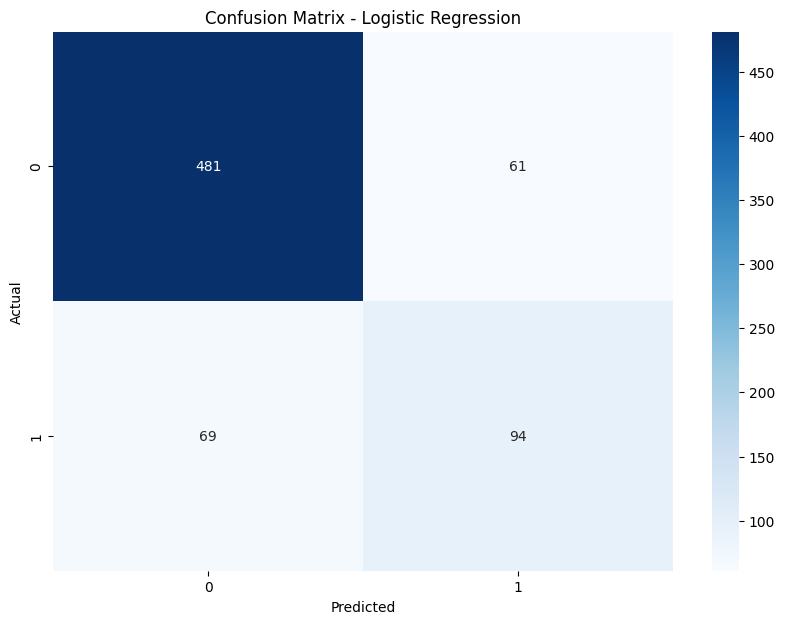

Best Classifier: Logistic Regression
Metrics:
{'Model': LogisticRegression(max_iter=1000), 'Accuracy': 0.8156028368794326, 'MSE': 0.18439716312056736, 'R^2': -0.03739841079392403, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.87      0.89      0.88       542\n           1       0.61      0.58      0.59       163\n\n    accuracy                           0.82       705\n   macro avg       0.74      0.73      0.74       705\nweighted avg       0.81      0.82      0.81       705\n'}


In [483]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
X = norm_feat_mat  # Feature matrix
y = target  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)

# List of classifiers to evaluate
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

# Store results
results = {}

# Evaluate each classifier
for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[name] = {
        "Model": clf,  # Store the trained model
        "Accuracy": accuracy,
        "MSE": mse,
        "R^2": r2,
        "Classification Report": classification_report(y_test, y_pred)
    }

    print(f"{name} - Accuracy: {accuracy:.4f}, MSE: {mse:.4f}, R^2: {r2:.4f}")
    print(classification_report(y_test, y_pred))
    print("\n")

# Find the best classifier based on accuracy
best_classifier_name = max(results, key=lambda k: results[k]["Accuracy"])
best_model = results[best_classifier_name]["Model"]
print(f"Best Classifier: {best_classifier_name}")

# Save the best model to a file named 'best_model.pkl'
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

# Plot the confusion matrix for the best classifier
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {best_classifier_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Summary of best classifier
print(f"Best Classifier: {best_classifier_name}")
print("Metrics:")
print(results[best_classifier_name])


In [484]:
import pickle
import numpy as np

# Load the saved model from the file
with open('best_model.pkl', 'rb') as model_file:
    best_model = pickle.load(model_file)

# Example new data (replace this with your actual new data)
# Ensure that the new data has the same feature format as the training data
new_data = np.array([[1.        , 1.        , 0.        , 0.36111111, 0.        ,
       0.5       , 0.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.66666667,
       0.72636816, 0.26921302, 0.70068935]])  # Example row 2

# Make predictions using the loaded model
predictions = best_model.predict(new_data)

# Print the predictions
print("Predictions for the new data:")
print(predictions)


Predictions for the new data:
[1]


In [485]:
indices = [idx for idx, value in enumerate(target) if value == 1]
print(indices)

[5, 6, 8, 11, 13, 15, 18, 34, 38, 42, 53, 54, 58, 62, 63, 65, 66, 68, 69, 71, 72, 77, 82, 83, 86, 87, 88, 92, 93, 107, 114, 117, 138, 140, 141, 143, 149, 150, 151, 157, 164, 171, 174, 176, 178, 184, 187, 191, 192, 193, 195, 198, 203, 205, 206, 208, 209, 215, 220, 222, 227, 234, 235, 244, 245, 246, 247, 249, 253, 254, 255, 265, 268, 269, 274, 280, 285, 286, 288, 291, 293, 295, 299, 308, 313, 316, 320, 323, 325, 326, 330, 331, 333, 337, 338, 343, 357, 360, 372, 374, 385, 394, 399, 402, 403, 405, 406, 407, 414, 420, 424, 431, 432, 433, 434, 435, 436, 441, 442, 444, 446, 447, 449, 450, 458, 461, 462, 463, 467, 471, 474, 479, 486, 488, 495, 497, 498, 499, 507, 509, 511, 513, 514, 517, 518, 523, 533, 537, 542, 545, 548, 552, 554, 555, 556, 557, 567, 571, 576, 577, 587, 588, 589, 590, 596, 599, 602, 607, 615, 616, 622, 625, 626, 627, 638, 641, 643, 646, 650, 651, 652, 653, 657, 662, 664, 668, 673, 677, 693, 697, 699, 703, 711, 712, 713, 716, 717, 720, 722, 724, 725, 730, 733, 735, 740, 742, 7

In [486]:
idx = 52

In [487]:
norm_feat_mat[idx]

array([0.        , 0.        , 0.        , 0.30555556, 0.        ,
       1.        , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.        , 1.        ,
       0.01343284, 0.04658435, 0.04447409])

In [495]:
feat_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Senior Citizen     7043 non-null   int32  
 1   Partner            7043 non-null   int32  
 2   Dependents         7043 non-null   int32  
 3   Tenure Months      7043 non-null   int64  
 4   Multiple Lines     7043 non-null   int32  
 5   Internet Service   7043 non-null   int32  
 6   Online Security    7043 non-null   int32  
 7   Online Backup      7043 non-null   int32  
 8   Device Protection  7043 non-null   int32  
 9   Tech Support       7043 non-null   int32  
 10  Streaming TV       7043 non-null   int32  
 11  Streaming Movies   7043 non-null   int32  
 12  Contract           7043 non-null   int32  
 13  Paperless Billing  7043 non-null   int32  
 14  Payment Method     7043 non-null   int32  
 15  Monthly Charges    7043 non-null   float64
 16  Total Charges      7043 

In [499]:
# List of columns to check
columns_to_check = [
    'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
    'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
    'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
    'Contract', 'Paperless Billing', 'Payment Method', 
    'Monthly Charges', 'Total Charges', 'CLTV'
]

# Loop through the specified columns and print unique values
for column in columns_to_check:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print()  # Add a new line for better readability


Unique values in 'Senior Citizen':
['No' 'Yes']

Unique values in 'Partner':
['Yes' 'No']

Unique values in 'Dependents':
['No' 'Yes']

Unique values in 'Tenure Months':
[42 17 62 65 54 41 15 46  3 25  8 43 47 60 10 48 12 58 72 63 28 59 24  2
 20 14  1 38 55  7 19 40 35 51 33 71 66 22 61  9 30 44 21  6 36 16 31 67
 70  4 50 69 23 13  5 64 27 68 26 56 29 37 34 52 45 39 49 32 11 57 53 18
  0]

Unique values in 'Multiple Lines':
['No' 'Yes' 'No phone service']

Unique values in 'Internet Service':
['Fiber optic' 'No' 'DSL']

Unique values in 'Online Security':
['No' 'No internet service' 'Yes']

Unique values in 'Online Backup':
['No' 'No internet service' 'Yes']

Unique values in 'Device Protection':
['Yes' 'No internet service' 'No']

Unique values in 'Tech Support':
['Yes' 'No internet service' 'No']

Unique values in 'Streaming TV':
['Yes' 'No internet service' 'No']

Unique values in 'Streaming Movies':
['Yes' 'No internet service' 'No']

Unique values in 'Contract':
['Two year' 'One

In [500]:
feat_mat.shape

(7043, 18)

In [488]:
target[idx]

0

In [489]:
import warnings

try:
    from sklearn.preprocessing import LabelEncoder
except ImportError:
    warnings.warn("Incompatible version of scikit-learn detected.")


In [490]:
feat_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Senior Citizen     7043 non-null   int32  
 1   Partner            7043 non-null   int32  
 2   Dependents         7043 non-null   int32  
 3   Tenure Months      7043 non-null   int64  
 4   Multiple Lines     7043 non-null   int32  
 5   Internet Service   7043 non-null   int32  
 6   Online Security    7043 non-null   int32  
 7   Online Backup      7043 non-null   int32  
 8   Device Protection  7043 non-null   int32  
 9   Tech Support       7043 non-null   int32  
 10  Streaming TV       7043 non-null   int32  
 11  Streaming Movies   7043 non-null   int32  
 12  Contract           7043 non-null   int32  
 13  Paperless Billing  7043 non-null   int32  
 14  Payment Method     7043 non-null   int32  
 15  Monthly Charges    7043 non-null   float64
 16  Total Charges      7043 

In [491]:
# # Save Encoder Configurations
# with open('XGB_model.pkl', 'wb') as f:
#     pickle.dump(model, f)

In [492]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Accuracy: 0.80
Mean Squared Error: 0.20
R-squared: -0.13


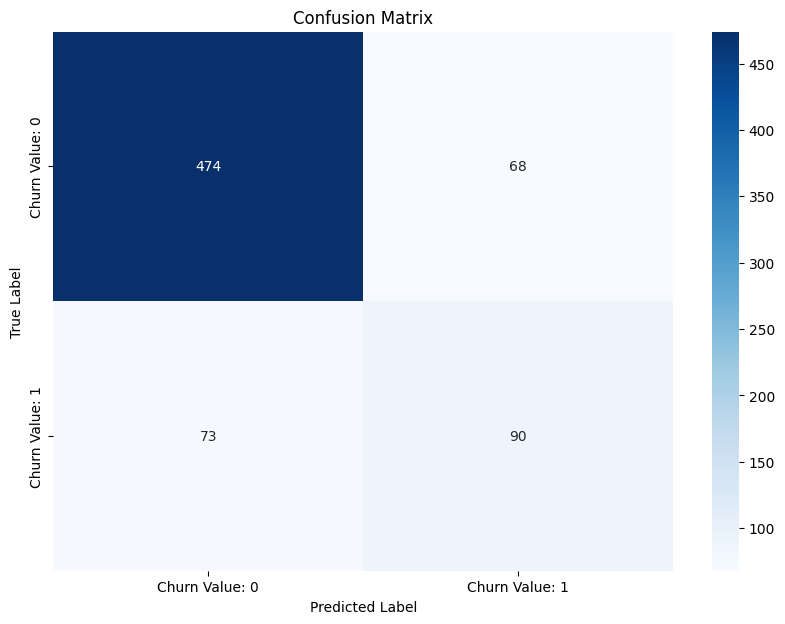

Classification Report:
                 precision    recall  f1-score   support

Churn Value: 0       0.87      0.87      0.87       542
Churn Value: 1       0.57      0.55      0.56       163

      accuracy                           0.80       705
     macro avg       0.72      0.71      0.72       705
  weighted avg       0.80      0.80      0.80       705



In [493]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Churn Value: 0', 'Churn Value: 1'], yticklabels=['Churn Value: 0', 'Churn Value: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['Churn Value: 0', 'Churn Value: 1'])
print("Classification Report:\n", class_report)

In [494]:
# # ROC Curve and AUC (optional, if binary classification)
# from sklearn.metrics import roc_curve, roc_auc_score

# # Compute ROC curve and AUC
# y_prob = model.predict_proba(X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# roc_auc = roc_auc_score(y_test, y_prob)

# # Plot ROC Curve
# plt.figure(figsize=(10, 7))
# plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

NameError: name 'model' is not defined

In [ ]:
class_distribution = pd.Series(y).value_counts()
print("Class distribution:\n", class_distribution)

Class distribution:
 Churn Value
0    5174
1    1869
Name: count, dtype: int64


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of boosting rounds
#     'learning_rate': [0.01, 0.1, 0.2],  # Step size
#     'max_depth': [3, 6, 9],  # Maximum depth of trees
#     'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight
#     'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used for fitting
#     'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features used for each tree
#     'gamma': [0, 0.1, 0.2],  # Regularization parameter
# }


# # Initialize XGBClassifier
# model = XGBClassifier()

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
#                            scoring='accuracy', cv=5, verbose=1, n_jobs=-1)



# # Fit GridSearchCV
# grid_search.fit(X_train, y_train)

# # Best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Cross-validation Score:", best_score)


# # Get the best model from grid search
# best_model = grid_search.best_estimator_

# # Make predictions
# y_pred = best_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)

# print(f"Accuracy: {accuracy:.2f}")
# print(f"Mean Squared Error: {mse:.2f}")
# print(f"R^2 Score: {r2:.2f}")
# print("Confusion Matrix:\n", conf_matrix)
# print("Classification Report:\n", class_report)


# # Plot confusion matrix
# plt.figure(figsize=(10, 7))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
#             xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()



